Hello, world! Welcome to my first complete Data Science project.  This project will cover most of the steps in a common Data Science framework:

1. Problem: What are you trying to solve? 

2. Gather the data: There is a big chance that the data is somewhere out there and you need to find it.

3. Prepare the data: After data collection, we need to process our data (outliers, missing data etc.) in order to create more accurate models.

4. Data exploration: Visualise and explore our data to identify patterns, variable types, categorisation and formulate hypothesis for our research. Furthermore, this step is likely to help us identify the models we need to look for.

5. Data modelling: Similar to data exploration, this step will give us some insight in our data. Additionally, it can predict future outcomes and determine the algorithms we can use to improve our results. 

6. Model validation and implementation: After training the model on a small subset of the entire dataset, it is the time to test the model on the entire dataset to check the accuracy and avoid overfitting/underfitting of the model. 

7. Model optimisation: This step requires you to go back to your model and check what can be improved. It is mostly done on a trial and error basis.


# 1. What am I trying to solve?

This project is trying to predict whether a transaction recorded in the dataset is fraudulent or not based on an existing dataset from Université Libre de Bruxelles. 


# 2. Data gathering

This step is already done for us by research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project.

# 3. Data exploration 

This project did not require data gathering, hence I avoided data architecture, governance, and extraction steps. We can only focus on data cleaning and preparation for modelling. 

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the authors cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Since our features are already PCA transformed by the authors, we can assume that they scaled the variables before doing the PCA Dimensionality Reduction. (Variables V1 through V28 are obtained with PCA). 

### Load all packages required for the project

In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))


#misc libraries
import collections
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*45)

Python version: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.25.1
matplotlib version: 3.1.1
NumPy version: 1.17.2
SciPy version: 1.3.1
IPython version: 7.8.0
scikit-learn version: 0.21.3
---------------------------------------------


### Data Modelling algorithms, visualisation libraries and data preparation tools

In [2]:

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [21]:
data = pd.read_csv("~/Downloads/creditcard.csv") 

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [4]:
#check the first 5 rows
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#check summary statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Check for NAs in the dataset - this dataset does not contain missing values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

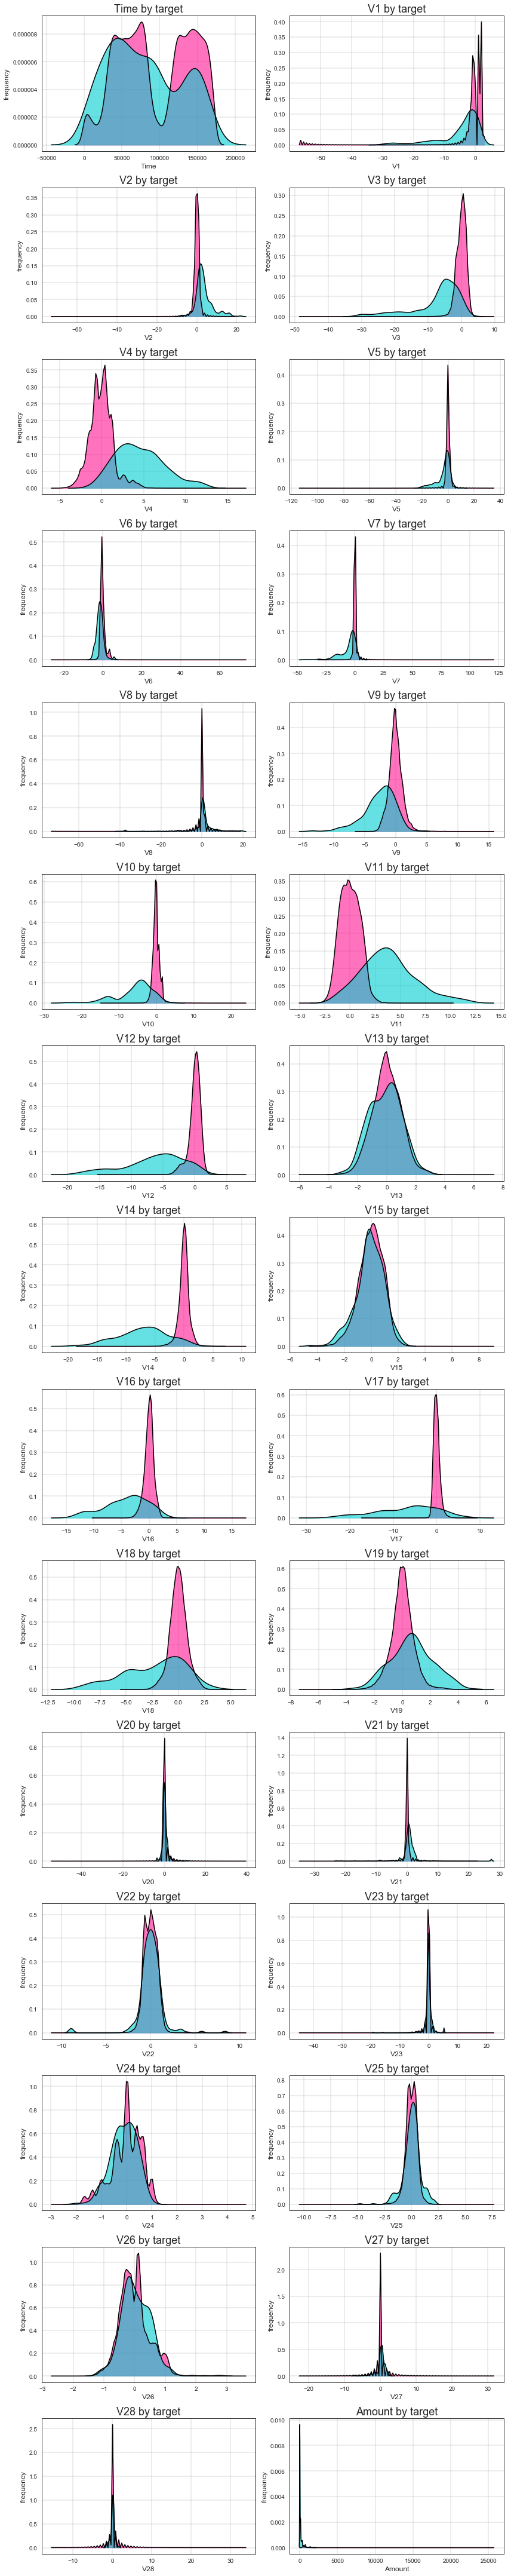

In [8]:
f,ax=plt.subplots(15,2,figsize=(12,60))
#f.delaxes(ax)
col = list(data)
col = [e for e in col if e not in ('Class')]

# Let's generate distplots for our data
for i,feature in enumerate(col):
    sns.distplot(data[data['Class']==1].dropna()[(feature)], ax=ax[i//2,i%2], kde_kws={"color":"black"}, hist=False )
    sns.distplot(data[data['Class']==0].dropna()[(feature)], ax=ax[i//2,i%2], kde_kws={"color":"black"}, hist=False )

    # Get the two lines from the ax[i//2,i%2]es to generate shading
    l1 = ax[i//2,i%2].lines[0]
    l2 = ax[i//2,i%2].lines[1]

    # Get the xy data from the lines so that we can shade
    x1 = l1.get_xydata()[:,0]
    y1 = l1.get_xydata()[:,1]
    x2 = l2.get_xydata()[:,0]
    y2 = l2.get_xydata()[:,1]
    ax[i//2,i%2].fill_between(x2,y2, color="deeppink", alpha=0.6)
    ax[i//2,i%2].fill_between(x1,y1, color="darkturquoise", alpha=0.6)

    #grid
    ax[i//2,i%2].grid(b=True, which='major', color='grey', linewidth=0.3)
    
    ax[i//2,i%2].set_title('{} by target'.format(feature), fontsize=18)
    ax[i//2,i%2].set_ylabel('count', fontsize=12)
    ax[i//2,i%2].set_xlabel('Modality', fontsize=12)

    #sns.despine(ax[i//2,i%2]=ax[i//2,i%2], left=True)
    ax[i//2,i%2].set_ylabel("frequency", fontsize=12)
    ax[i//2,i%2].set_xlabel(str(feature), fontsize=12)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

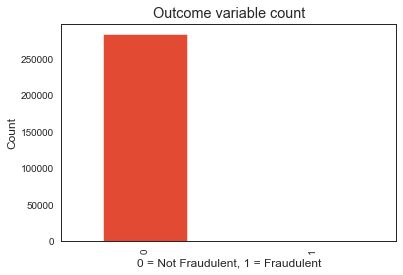

In [9]:
#Check the outcome variable ['Class']

class_counter = pd.value_counts(data['Class'], sort = True).sort_index()
class_counter.plot(kind = 'bar')
plt.title("Outcome variable count")
plt.xlabel("0 = Not Fraudulent, 1 = Fraudulent")
plt.ylabel("Count")

#We can see that we have 284315 instances of 0 and only 492 fraudulent transactions
#which suggests that our data is highly skewed which we need to fix

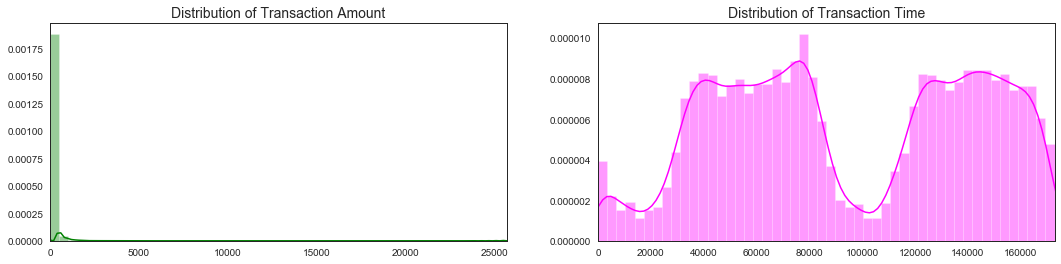

In [10]:
#Plotting distribution of ['Amount', 'Time'] variables in the dataset

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='green')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='magenta')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## Scaling and distribution

Take a moment to look at the graphs plotted above. Outcome variable Class is highly skewed because most of the transactions are non-fraudulent. Similarly, Amount and Time variables are skewed because of the nature of the data, and unlike other variables V1 through V28 which are products of principal component analysis, Amount and Time are not scaled.   



In [11]:
# Let's scale Amount and Time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Robust scaler is better for data with a lot of outliers

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

data['AmountScaled'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['TimeScaled'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data.drop(['Amount', 'Time'], axis = 1, inplace = True)



In [12]:
amount_scaled = data['AmountScaled']
time_scaled = data['TimeScaled']
data.drop(['AmountScaled', 'TimeScaled'], axis = 1, inplace = True)
data.insert(0, 'amount_scaled', amount_scaled)
data.insert(1, 'time_scaled', time_scaled)
data.head()

,amount_scaled,time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting the dataset with random undersampling 

We split the dataset because in a sub-sample because our data is heavily skewed. Our outcome variable Class assumes that only a tiny fraction of cases is fraudulent. Hence, we might get biased results and we want our model to actually identify the potential fraud rather than implicitly assuming that it is not.

We will now proceed to create a 50/50 ratio in the dataset.

In [13]:
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']

# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


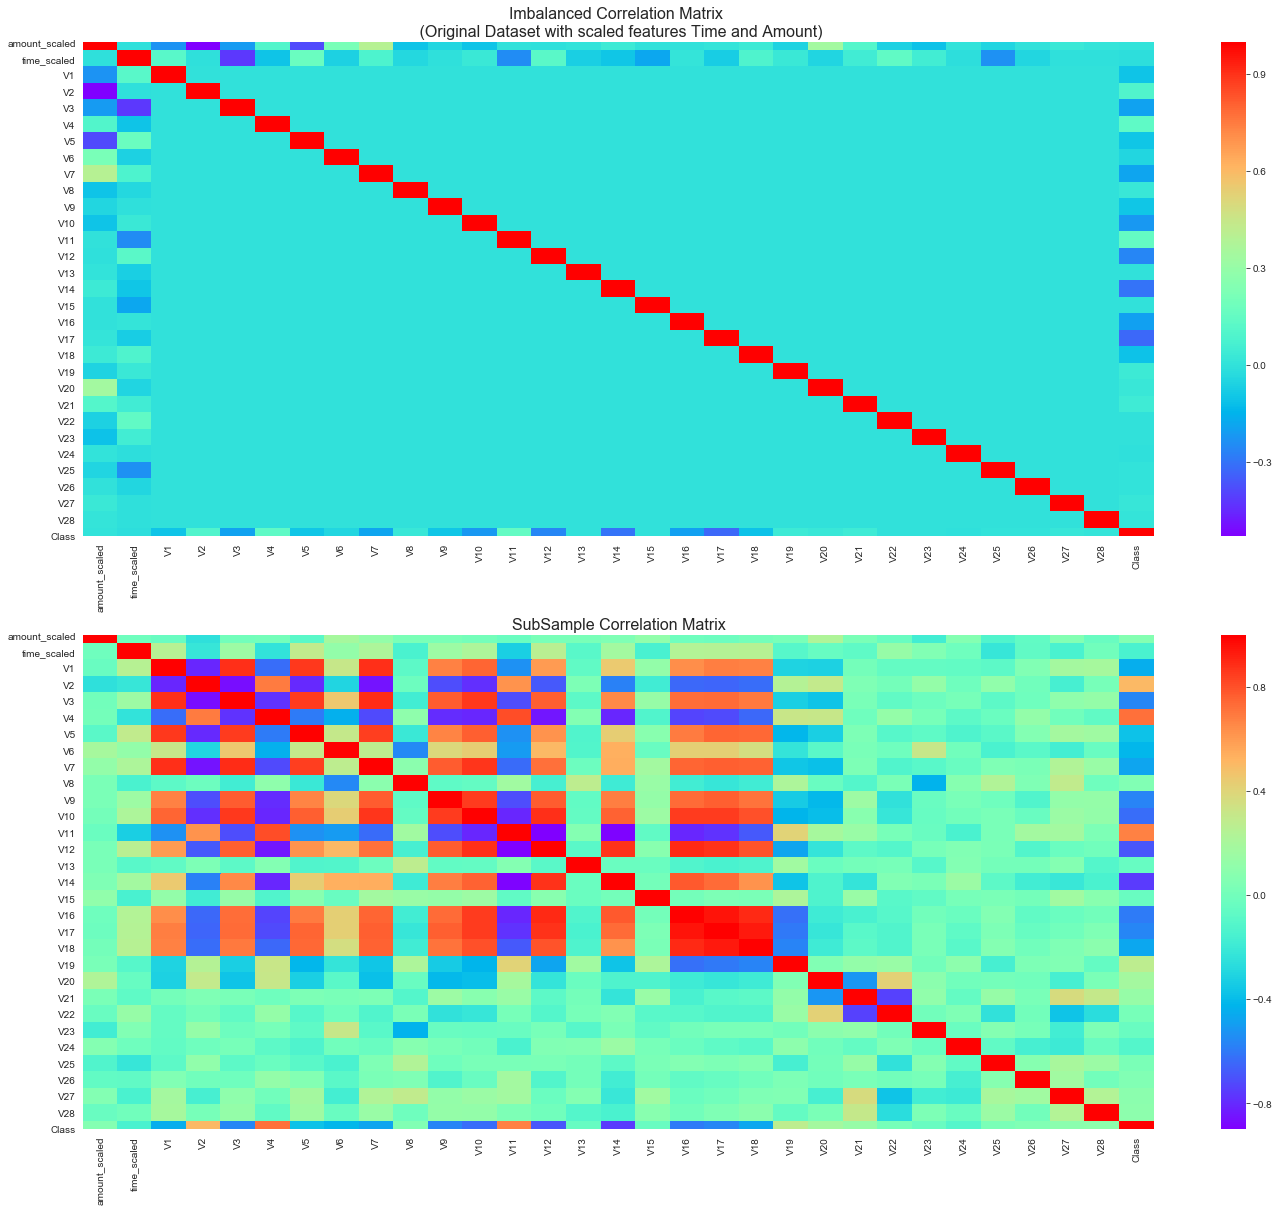

In [14]:
# Let's investigate correlation of our new subsample

f, (ax1, ax2) = plt.subplots(2, 1, figsize =(24,20))

corr = data.corr()
sns.heatmap(corr, cmap='rainbow', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (Original Dataset with scaled features Time and Amount)", fontsize=16)

sub_sample_corr = under_sample_data.corr()
sns.heatmap(sub_sample_corr, cmap='rainbow', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=16)
plt.show()

## Logistic Regression

In [15]:
X = X_undersample
y = y_undersample
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Turn variables into arrays in order to apply the Logistic Regression
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
classifier = LogisticRegression()

classifier.fit(X_train, y_train)
training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
print('Logistic regression has a training score of: ', round(training_score.mean(), 2), 'or ',round(training_score.mean(), 2)*100, '%')



Logistic regression has a training score of:  0.94 or  94.0 %


### GridSearchCV to find the most suitable parameters for classifier (in this case Logistic Regression)

In [17]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg.fit(X_train, y_train)

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.9%


### Confusion Matrix

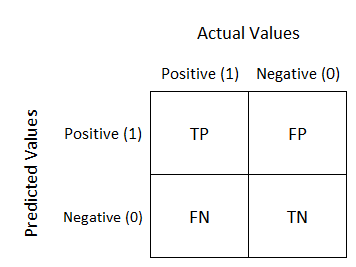
Photo source: Understanding Confusion Matrix (Sarang Narkhede for TowardsDataScience.com)

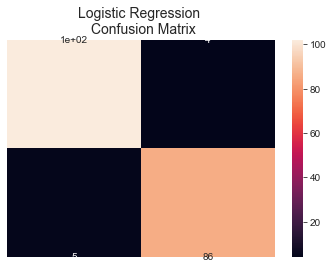

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_test)

log_reg_cf = confusion_matrix(y_test, y_pred)
conf_matrix_plt = sns.heatmap(log_reg_cf, annot = True)
conf_matrix_plt.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
conf_matrix_plt.set_xticklabels(['', ''], fontsize=18, rotation=90)
conf_matrix_plt.set_yticklabels(['', ''], fontsize=18, rotation=360)

plt.show()

### Classification Report 

In [19]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('Logistic Regression Model Classification Report: ', classification_rep)

Logistic Regression Model Classification Report:                precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        91

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

